<a href="https://colab.research.google.com/github/gauravsax1911/tensk/blob/main/ANN_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt


In [6]:
import tensorflow as tf
from tensorflow import keras


In [18]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()



In [5]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [8]:
from sklearn.model_selection import train_test_split
X_train_full , X_test , y_train_full , y_test = train_test_split(housing.data , housing.target,random_state = 42 )
X_train , X_valid , y_train , y_valid = train_test_split(X_train_full, y_train_full , random_state = 42)


In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler ()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [11]:
np.random.seed(42)
tf.random.set_seed(42)

In [12]:
X_train.shape

(11610, 8)

In [13]:
X_valid.shape

(3870, 8)

In [14]:
X_test.shape

(5160, 8)

In [21]:
model = keras.models.Sequential([
                                keras.layers.Dense(30,activation ="relu", input_shape= X_train.shape[1:]),
                                keras.layers.Dense(30,activation="relu"),
                                keras.layers.Dense(1)
])

In [22]:
model.compile(loss="mean_squared_error",
              optimizer = keras.optimizers.SGD(lr=1e-3),
              metrics=["mae"])

In [23]:
model_history = model.fit(X_train,y_train,epochs=40,validation_data=(X_valid,y_valid))

Epoch 1/40
363/363 [==============================] - 1s 2ms/step - loss: 3.0681 - mae: 1.3449 - val_loss: 1.3779 - val_mae: 0.7073
Epoch 2/40
363/363 [==============================] - 0s 1ms/step - loss: 0.8428 - mae: 0.6853 - val_loss: 0.6885 - val_mae: 0.6238
Epoch 3/40
363/363 [==============================] - 0s 1ms/step - loss: 0.7087 - mae: 0.6285 - val_loss: 0.6645 - val_mae: 0.5892
Epoch 4/40
363/363 [==============================] - 0s 1ms/step - loss: 0.6599 - mae: 0.5997 - val_loss: 0.5944 - val_mae: 0.5685
Epoch 5/40
363/363 [==============================] - 0s 1ms/step - loss: 0.5955 - mae: 0.5734 - val_loss: 0.5505 - val_mae: 0.5434
Epoch 6/40
363/363 [==============================] - 0s 1ms/step - loss: 0.5569 - mae: 0.5517 - val_loss: 0.5211 - val_mae: 0.5268
Epoch 7/40
363/363 [==============================] - 0s 1ms/step - loss: 0.5480 - mae: 0.5416 - val_loss: 0.5055 - val_mae: 0.5115
Epoch 8/40
363/363 [==============================] - 0s 1ms/step - loss: 0.

In [24]:
mae_test = model.evaluate(X_train,y_train)

363/363 [==============================] - 0s 812us/step - loss: 0.3669 - mae: 0.4295


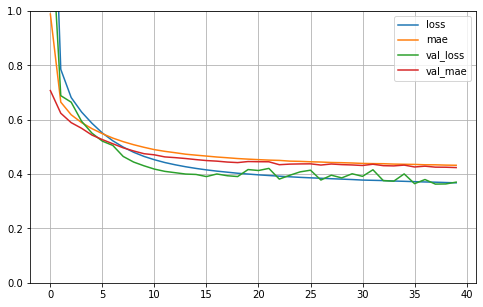

In [27]:
import pandas as pd

pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()